### Importing libraries

In [76]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from utils import clean_data, remove_outliers_iqr, find_optimal_clusters, plot_cluster_metrics

### Loading and Inspecting the Dataset

In [77]:
# Load the dataset
df = pd.read_csv('../data/profiles_dataset.csv')
df.head()

,timestamp,account_id,nickname,biography,awg_engagement_rate,comment_engagement_rate,like_engagement_rate,bio_link,is_verified,followers,following,likes,videos_count,create_time,id,top_videos,url,profile_pic_url
0,2023-08-01,a.r.m.y664,❤️❤️❤️,nazywam się Basia 🇵🇱+🇺🇸 moja mama jest z USA 🖤...,0.049630,0.004473,0.045157,NaN,False,1755,1443,1586,20,NaN,6794435137251820550,https://www.tiktok.com/@a.r.m.y664/video/68236...,https://www.tiktok.com/@a.r.m.y664,https://p77-sign-va.tiktokcdn.com/musically-ma...
1,2023-08-01,a2_9r,ايمن الفستقي🍺🥂🥃,حسابي الاصلي تيكتككك(_8_ytp_,0.059322,0.004358,0.054964,NaN,False,354,1422,3843,225,NaN,7019722709156430853,https://www.tiktok.com/@a2_9r/video/7218348887...,https://www.tiktok.com/@a2_9r,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
2,2023-07-30,ti.po.check,All,Активный пользователь ТикТока 🌝\nМеня зовут BD...,0.001399,0.000058,0.001341,NaN,False,1960,243,24000,228,NaN,6826677567140873222,https://www.tiktok.com/@ti.po.check/video/6984...,https://www.tiktok.com/@ti.po.check,https://p58-sign-sg.tiktokcdn.com/aweme/720x72...
3,2023-08-06,nutrifersanort,L.N Fernanda Sánchez,"Nutrióloga, educadora en diabetes.",0.469767,0.004651,0.465116,NaN,False,43,41,100,5,NaN,6809397670235407365,https://www.tiktok.com/@nutrifersanort/video/7...,https://www.tiktok.com/@nutrifersanort,https://p16-sign-va.tiktokcdn.com/tos-maliva-a...
4,2023-07-25,bhgdee,D💲,Ig-bhg.dee📸\nSc-dannieo2099 👻\nFb- frank matth...,0.122283,0.008152,0.114130,NaN,False,276,2262,126,4,NaN,6810526136080483334,https://www.tiktok.com/@bhgdee/video/719722663...,https://www.tiktok.com/@bhgdee,https://p16-sign.tiktokcdn-us.com/tos-useast5-...


In [78]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   timestamp                1000 non-null   object 
 1   account_id               1000 non-null   object 
 2   nickname                 1000 non-null   object 
 3   biography                997 non-null    object 
 4   awg_engagement_rate      1000 non-null   float64
 5   comment_engagement_rate  1000 non-null   float64
 6   like_engagement_rate     1000 non-null   float64
 7   bio_link                 191 non-null    object 
 8   is_verified              1000 non-null   bool   
 9   followers                1000 non-null   int64  
 10  following                1000 non-null   int64  
 11  likes                    1000 non-null   int64  
 12  videos_count             1000 non-null   int64  
 13  create_time              0 non-null      float64
 14  id                       

(1000, 18)

### Data Cleaning

In [79]:
df_clean = clean_data(df)

# Select features for clustering
feature_cols = [
    'awg_engagement_rate', 
    'comment_engagement_rate', 
    'like_engagement_rate',
    'followers',
    'following',
    'likes',
    'videos_count',
    'is_verified'
]

Duplicates found: 0


### Preprocessing the Data
Select relevant features for the analysis, and encode categorical variables if necessary, and getting the data ready for clustering.

In [80]:
# Encode the 'is_verified' boolean column as an integer
df_clean['is_verified'] = df_clean['is_verified'].astype(int)

In [81]:
# Create a subset with selected features
df_features = df_clean[feature_cols].copy()

In [82]:
# Handle outliers in engagement metrics
engagement_cols = ['awg_engagement_rate', 'comment_engagement_rate', 'like_engagement_rate']
df_no_outliers = remove_outliers_iqr(df_features, engagement_cols)
print(f"Dataset shape after removing outliers: {df_no_outliers.shape}")

Dataset shape after removing outliers: (683, 8)


IQR removal is better for this dataset since it has a lot of outliers and is difficult to visualize the clusters, even though it removed more than the half of the dataset, it's easier to illustrate

### Feature Scaling
K-means clustering is sensitive to the scale of the data, in this case we apply Standard Scaler because the data is spread out and there are many outliers

In [83]:
# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_no_outliers)

### Optimal Number of Clusters
Use the Elbow Method to determine the most appropriate number of clusters for k-means clustering. Generally the range of cluster values oftenly chosen are from 1 to 7.

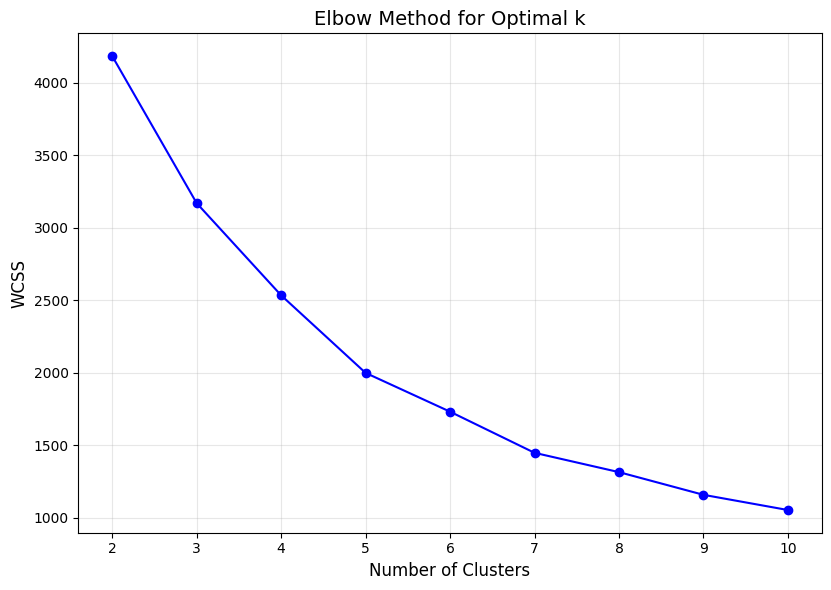

In [84]:
# Find optimal number of clusters
wcss = find_optimal_clusters(scaled_features)
plot_cluster_metrics(wcss)

### K-Means Clustering
Perform k-means clustering using the optimal number of clusters determined in the previous step.

In [94]:
# Choose optimal k and perform clustering
optimal_k = 5 # Based on plots
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
df_no_outliers['cluster'] = kmeans.fit_predict(scaled_features)

### Visualizing Clusters
Plot the clusters to visually assess how distinct they are from each other.

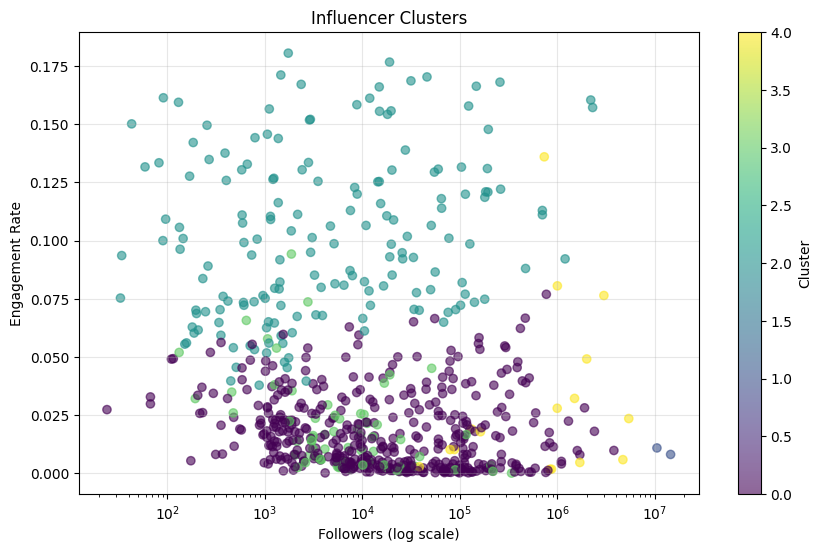

In [95]:
# Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(
    df_no_outliers['followers'], 
    df_no_outliers['awg_engagement_rate'],
    c=df_no_outliers['cluster'], 
    cmap='viridis', 
    alpha=0.6
)
plt.xscale('log')
plt.xlabel('Followers (log scale)')
plt.ylabel('Engagement Rate')
plt.title('Influencer Clusters')
plt.colorbar(label='Cluster')
plt.grid(True, alpha=0.3)
plt.show()

### Analyzing Cluster Centroids
Examine the centroids of the clusters to understand the defining characteristics of each cluster. This helps in interpreting the types of influencers within each cluster.

In [96]:
# Analyze the clusters
cluster_profiles = df_no_outliers.groupby('cluster').mean()
print(cluster_profiles)

         awg_engagement_rate  comment_engagement_rate  like_engagement_rate  \
cluster                                                                       
0                   0.017622                 0.000575              0.017047   
1                   0.009517                 0.000056              0.009462   
2                   0.101997                 0.002679              0.099318   
3                   0.018624                 0.001165              0.017460   
4                   0.031252                 0.000300              0.030952   

            followers    following         likes  videos_count  is_verified  
cluster                                                                      
0        1.066223e+05   792.002336  2.874820e+06    422.656542          0.0  
1        1.250000e+07    29.500000  6.052500e+08   1590.000000          0.5  
2        6.971139e+04   776.858824  1.858375e+06    155.317647          0.0  
3        2.270360e+04  7482.746269  2.128369e+05    580.

### Interpreting the Clusters

- Cluster 2 has the highest engagement rate (10%) but none of the accounts are verified, this cluster shows nano influencers with high engagement rate.
- Cluster 1 has the highest follower count (12.5M) but lowest engagement, this clusters shows big influencers and according to this dataset they have almost no engagement.
- Cluster 4 has all verified accounts (is_verified = 1.0), high followers but also low engagement, similar to cluster 2 but with verified accounts, most probably macro influencers.